In [1]:
%pip install seaborn

In [17]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [3]:
# Đọc dữ liệu từ 4 file CSV
FPT = 'FPT.csv'
MSN = 'MSN.csv'
PNJ = 'PNJ.csv'
VIC = 'VIC.csv'

df1 = pd.read_csv(FPT)
df2 = pd.read_csv(MSN)
df3 = pd.read_csv(PNJ)
df4 = pd.read_csv(VIC)

# Ghép các bảng dữ liệu lại với nhau
df = pd.concat([df1, df2, df3, df4], ignore_index=True)


In [4]:
df.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [5]:
df.tail()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
459330,VIC,12/22/2020 14:22,105.8,105.8,105.7,105.7,1870,0
459331,VIC,12/22/2020 14:23,105.7,105.7,105.7,105.7,2510,0
459332,VIC,12/22/2020 14:24,105.7,105.7,105.7,105.7,3620,0
459333,VIC,12/22/2020 14:25,105.7,105.7,105.7,105.7,100,0
459334,VIC,12/22/2020 14:46,105.7,105.7,105.7,105.7,90,0


In [6]:
# Tính biến động giá cổ phiếu
# Dùng shift để lấy giá cổ phiếu N (phút hoặc giờ hoặc ngày) sau
N = 1  # Thay đổi giá trị của N tùy thuộc vào khoảng thời gian bạn quan tâmn
df['BienDongGia'] = df.groupby('Ticker')['Close'].shift(-N) - df['Close']

# Loại bỏ các dòng có giá trị NaN (có thể xuất hiện do shift)
df.dropna(inplace=True)

In [7]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Open Interest']
X = df[features]
y = df['BienDongGia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Xây dựng mô hình dự đoán biến động giá cổ phiếu
model = RandomForestRegressor(n_estimators=20, random_state=12)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=12)

In [9]:
# Đánh giá mô hình trên tập kiểm tra
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


# Additional regression metrics
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Set: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared on Test Set: {r2}')


Mean Squared Error on Test Set: 0.13777131128636902
Mean Absolute Error on Test Set: 0.18112738818195045
R-squared on Test Set: 0.09843933276352701


In [24]:
df1=df.reset_index()['Close']

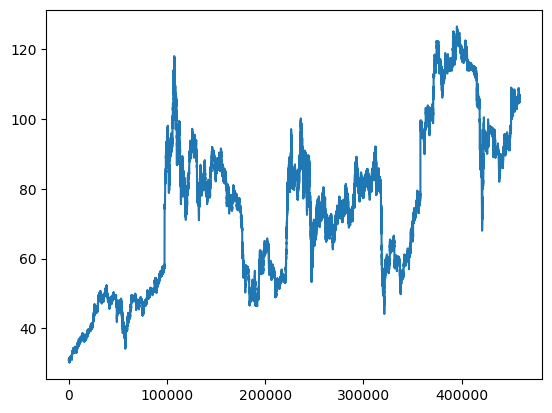

In [25]:
import matplotlib.pyplot as plt
plt.plot(df1)

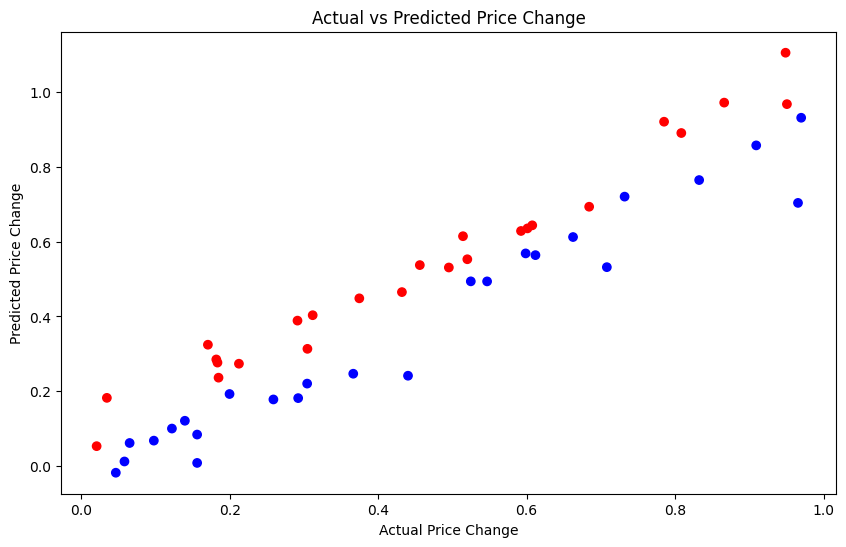

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are your actual and predicted values
# Generate some example data for demonstration
np.random.seed(42)
y_test = np.random.rand(50)
y_pred = y_test + np.random.normal(0, 0.1, 50)

# Create a scatter plot with different colors for actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c=['blue' if actual > predicted else 'red' for actual, predicted in zip(y_test, y_pred)])
plt.xlabel('Actual Price Change')
plt.ylabel('Predicted Price Change')
plt.title('Actual vs Predicted Price Change')
plt.show()

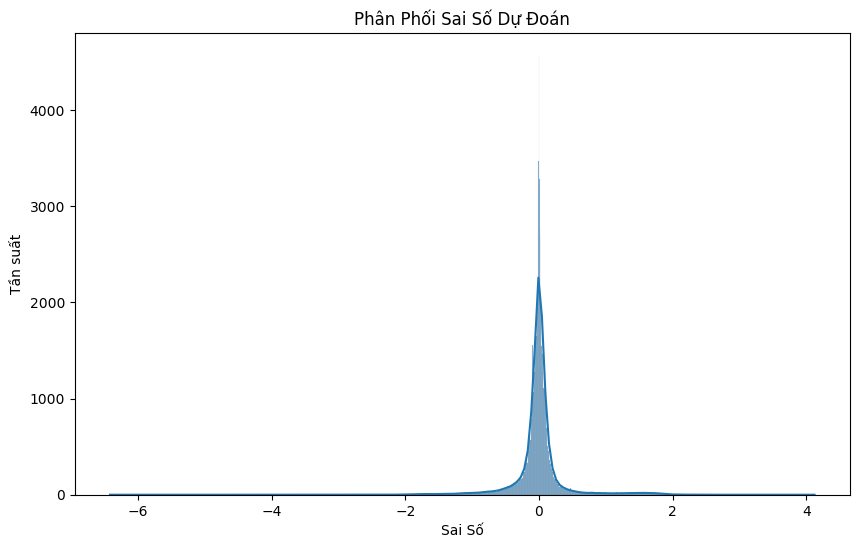

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.title('Phân Phối Sai Số Dự Đoán')
plt.xlabel('Sai Số')
plt.ylabel('Tần suất')
plt.show()

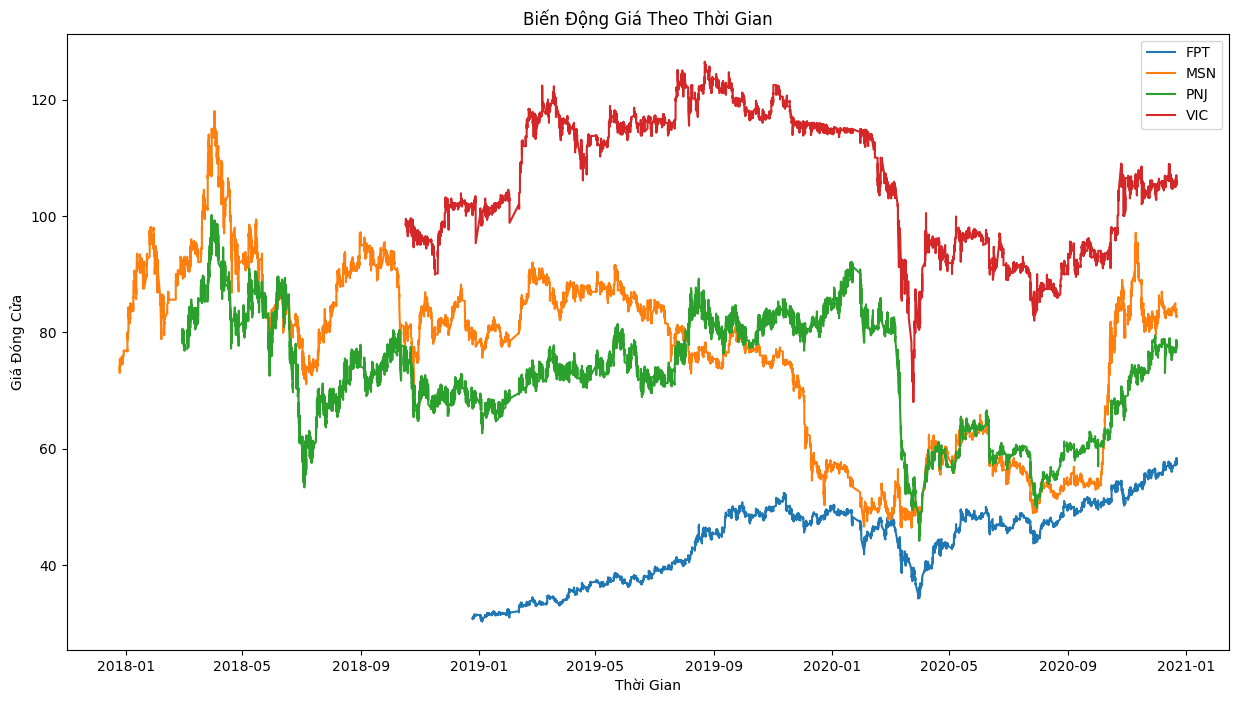

In [23]:
# Chuyển định dạng cột 'Date/Time' sang datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Vẽ biểu đồ
plt.figure(figsize=(15, 8))
for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker]
    plt.plot(ticker_data['Date/Time'], ticker_data['Close'], label=ticker)

plt.title('Biến Động Giá Theo Thời Gian')
plt.xlabel('Thời Gian')
plt.ylabel('Giá Đóng Cửa')
plt.legend()
plt.show()


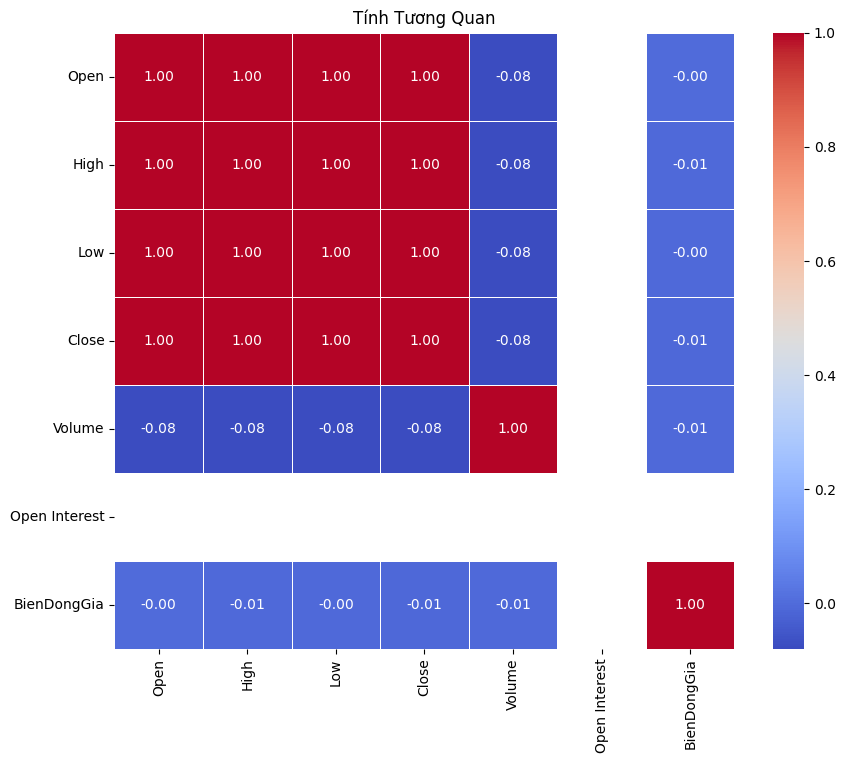

In [14]:
import seaborn as sns

# Tạo DataFrame mới cho tính tương quan
corr_df = pd.concat([X, y], axis=1)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Tính Tương Quan')
plt.show()